# NATURAL GAS PRICE PREDICTION 


# Importing the Libraries

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Importing the Data into a Pandas DataFrame for further analysis

In [20]:
data=pd.read_csv('../data/natural gas.csv')
data

Date  LPG_Price  HP_Price  Crude_Oil  Import_Vol  Demand  Supply  \
0     01-01-2021     700.10   1099.74      49.97        1.00    2.53    2.48   
1     02-01-2021     700.07   1099.01      49.91        1.00    2.53    2.60   
2     03-01-2021     700.20   1099.21      49.92        0.99    2.51    2.57   
3     04-01-2021     700.51   1099.76      49.92        1.03    2.51    2.48   
4     05-01-2021     700.46   1099.71      49.94        1.02    2.53    2.53   
...          ...        ...       ...        ...         ...     ...     ...   
1747  14-10-2025     717.80   1099.42      47.42        0.96    2.70    2.80   
1748  15-10-2025     717.84   1099.90      47.39        0.97    2.67    2.65   
1749  16-10-2025     718.04   1099.64      47.32        0.98    2.69    2.74   
1750  17-10-2025     717.50   1099.66      47.28        0.99    2.68    2.73   
1751  18-10-2025     717.64   1099.68      47.22        0.99    2.71    2.71   

      Subsidy  Exchange_Rate  Inflation  Month  Supply_Demand_Ratio  
0       49.82          72.98       4.05      1                 0.98  
1       47.22          72.99       4.02      1                 1.03  
2       50.37          72.98       3.98      1                 1.02  
3       51.97          72.99       4.00      1                 0.99  
4       47.77          72.98       3.99      1                 1.00  
...       ...            ...        ...    ...                  ...  
1747    52.72          73.52       3.82     10                 1.03  
1748    47.41          73.51       3.92     10                 0.99  
1749    51.16          73.50       3.86     10                 1.02  
1750    53.59          73.49       3.84     10                 1.02  
1751    50.29          73.49       3.79     10                 1.00  

[1752 rows x 12 columns]

First 5 entries of the data

In [21]:
data.head()

Date  LPG_Price  HP_Price  Crude_Oil  Import_Vol  Demand  Supply  \
0  01-01-2021     700.10   1099.74      49.97        1.00    2.53    2.48   
1  02-01-2021     700.07   1099.01      49.91        1.00    2.53    2.60   
2  03-01-2021     700.20   1099.21      49.92        0.99    2.51    2.57   
3  04-01-2021     700.51   1099.76      49.92        1.03    2.51    2.48   
4  05-01-2021     700.46   1099.71      49.94        1.02    2.53    2.53   

   Subsidy  Exchange_Rate  Inflation  Month  Supply_Demand_Ratio  
0    49.82          72.98       4.05      1                 0.98  
1    47.22          72.99       4.02      1                 1.03  
2    50.37          72.98       3.98      1                 1.02  
3    51.97          72.99       4.00      1                 0.99  
4    47.77          72.98       3.99      1                 1.00

Splitting the Date into 3 columns

In [22]:
data['year'] = pd.DatetimeIndex(data['Date']).year
data['month'] = pd.DatetimeIndex(data['Date']).month
data['day'] = pd.DatetimeIndex(data['Date']).day

In [23]:
data.drop('Date',axis=1,inplace=True)

In [24]:
data

LPG_Price  HP_Price  Crude_Oil  Import_Vol  Demand  Supply  Subsidy  \
0        700.10   1099.74      49.97        1.00    2.53    2.48    49.82   
1        700.07   1099.01      49.91        1.00    2.53    2.60    47.22   
2        700.20   1099.21      49.92        0.99    2.51    2.57    50.37   
3        700.51   1099.76      49.92        1.03    2.51    2.48    51.97   
4        700.46   1099.71      49.94        1.02    2.53    2.53    47.77   
...         ...       ...        ...         ...     ...     ...      ...   
1747     717.80   1099.42      47.42        0.96    2.70    2.80    52.72   
1748     717.84   1099.90      47.39        0.97    2.67    2.65    47.41   
1749     718.04   1099.64      47.32        0.98    2.69    2.74    51.16   
1750     717.50   1099.66      47.28        0.99    2.68    2.73    53.59   
1751     717.64   1099.68      47.22        0.99    2.71    2.71    50.29   

      Exchange_Rate  Inflation  Month  Supply_Demand_Ratio  year  month  day  
0             72.98       4.05      1                 0.98  2021      1    1  
1             72.99       4.02      1                 1.03  2021      2    1  
2             72.98       3.98      1                 1.02  2021      3    1  
3             72.99       4.00      1                 0.99  2021      4    1  
4             72.98       3.99      1                 1.00  2021      5    1  
...             ...        ...    ...                  ...   ...    ...  ...  
1747          73.52       3.82     10                 1.03  2025     10   14  
1748          73.51       3.92     10                 0.99  2025     10   15  
1749          73.50       3.86     10                 1.02  2025     10   16  
1750          73.49       3.84     10                 1.02  2025     10   17  
1751          73.49       3.79     10                 1.00  2025     10   18  

[1752 rows x 14 columns]

# Handling Null Values

In [25]:
data.isnull().any()

LPG_Price              False
HP_Price               False
Crude_Oil              False
Import_Vol             False
Demand                 False
Supply                 False
Subsidy                False
Exchange_Rate          False
Inflation              False
Month                  False
Supply_Demand_Ratio    False
year                   False
month                  False
day                    False
dtype: bool

As it is continuous data so we are checking it is normal distribution or skewed distribution?

<Axes: xlabel='LPG_Price', ylabel='Count'>

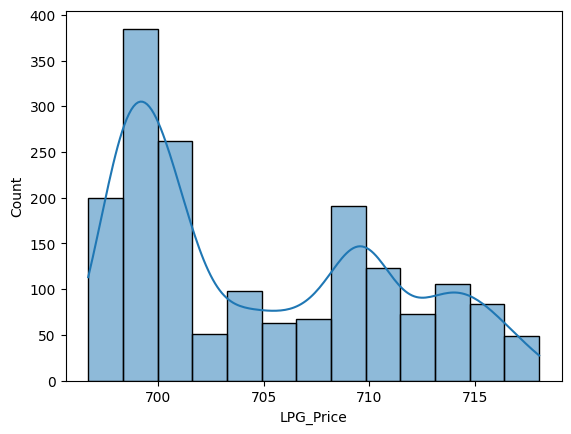

In [33]:
sns.histplot(data['LPG_Price'].dropna(), kde=True)


<Axes: xlabel='HP_Price', ylabel='Count'>

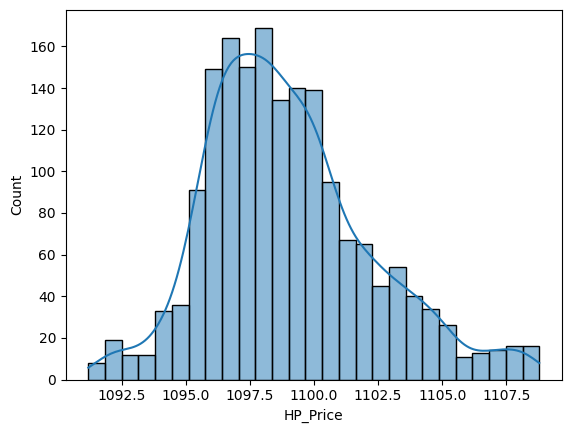

In [ ]:
sns.histplot(data['HP_Price'].dropna(), kde=True)

As we got Skew distribution curve so we are filling NULL values with median

In [36]:
data['LPG_Price'].fillna(data['LPG_Price'].median(), inplace=True)
data['HP_Price'].fillna(data['HP_Price'].median(), inplace=True)


In [37]:
data.isnull().sum()

LPG_Price              0
HP_Price               0
Crude_Oil              0
Import_Vol             0
Demand                 0
Supply                 0
Subsidy                0
Exchange_Rate          0
Inflation              0
Month                  0
Supply_Demand_Ratio    0
year                   0
month                  0
day                    0
dtype: int64

In [38]:
data.describe()

LPG_Price     HP_Price    Crude_Oil   Import_Vol       Demand  \
count  1752.000000  1752.000000  1752.000000  1752.000000  1752.000000   
mean    704.755108  1098.992215    48.230559     0.999663     2.506296   
std       6.135511     3.222690     1.327195     0.071623     0.141663   
min     696.670000  1091.190000    46.310000     0.870000     2.260000   
25%     699.177500  1096.717500    47.150000     0.930000     2.360000   
50%     702.305000  1098.480000    47.530000     1.000000     2.520000   
75%     709.790000  1100.672500    49.292500     1.070000     2.640000   
max     718.040000  1108.790000    51.210000     1.120000     2.770000   

            Supply      Subsidy  Exchange_Rate    Inflation        Month  \
count  1752.000000  1752.000000    1752.000000  1752.000000  1752.000000   
mean      2.506878    50.858037      73.093687     4.055325     6.324201   
std       0.149759     2.124261       0.198525     0.205626     3.376089   
min       2.150000    42.980000      72.750000     3.600000     1.000000   
25%       2.370000    49.430000      72.930000     3.880000     3.000000   
50%       2.520000    50.870000      73.040000     4.090000     6.000000   
75%       2.640000    52.302500      73.230000     4.240000     9.000000   
max       2.830000    58.090000      73.520000     4.420000    12.000000   

       Supply_Demand_Ratio         year        month          day  
count          1752.000000  1752.000000  1752.000000  1752.000000  
mean              1.000177  2022.916096     6.392694    15.589612  
std               0.019238     1.381667     3.405896     8.852298  
min               0.940000  2021.000000     1.000000     1.000000  
25%               0.990000  2022.000000     3.000000     8.000000  
50%               1.000000  2023.000000     6.000000    16.000000  
75%               1.010000  2024.000000     9.000000    23.000000  
max               1.080000  2025.000000    12.000000    31.000000

# Finding and Removing Outliers

<Axes: xlabel='HP_Price'>

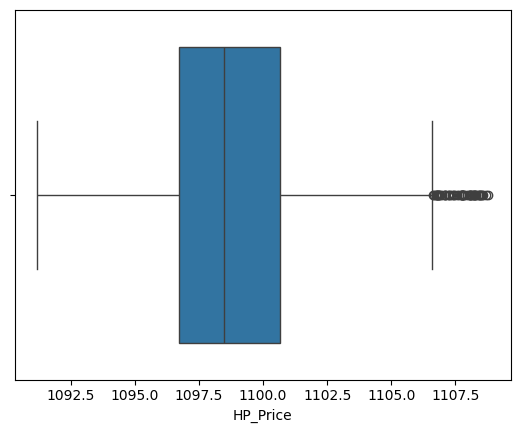

In [41]:
sns.boxplot(x=data['HP_Price'])


<Axes: xlabel='LPG_Price'>

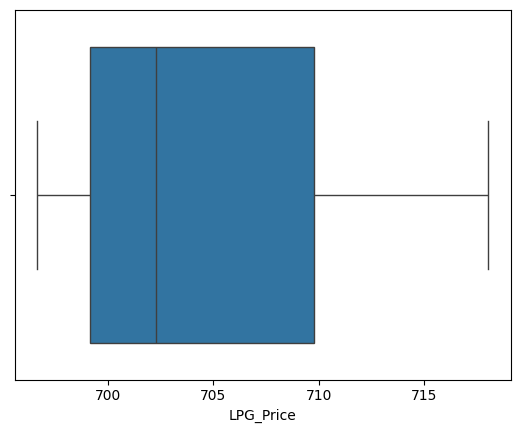

In [42]:
sns.boxplot(x=data['LPG_Price'])


In [43]:
from scipy import stats

In [44]:
z=np.abs(stats.zscore(data))
z

array([[0.75893233, 0.23210388, 1.31098835, ..., 1.38719589, 1.58379273,
        1.6485863 ],
       [0.76382329, 0.00552038, 1.26576732, ..., 1.38719589, 1.29010043,
        1.6485863 ],
       [0.74262911, 0.06759805, 1.27330415, ..., 1.38719589, 0.99640813,
        1.6485863 ],
       ...,
       [2.1658644 , 0.20106504, 0.6862739 , ..., 1.508684  , 1.05943798,
        0.04637274],
       [2.07782704, 0.20727281, 0.71642125, ..., 1.508684  , 1.05943798,
        0.15937001],
       [2.10065154, 0.21348058, 0.76164229, ..., 1.508684  , 1.05943798,
        0.27236728]])

In [45]:
threshold=3
np.where(z>threshold)

(array([  31,  223,  254,  448,  498,  668,  826,  846,  932,  952,  991,
         999, 1010, 1425, 1457], dtype=int64),
 array([ 6,  6,  6,  6, 10,  6,  6, 10, 10,  6,  1,  1, 10, 10, 10],
       dtype=int64))

In [46]:
df_no_outliers=data[(z<=3).all(axis=1)]
df_no_outliers

LPG_Price  HP_Price  Crude_Oil  Import_Vol  Demand  Supply  Subsidy  \
0        700.10   1099.74      49.97        1.00    2.53    2.48    49.82   
1        700.07   1099.01      49.91        1.00    2.53    2.60    47.22   
2        700.20   1099.21      49.92        0.99    2.51    2.57    50.37   
3        700.51   1099.76      49.92        1.03    2.51    2.48    51.97   
4        700.46   1099.71      49.94        1.02    2.53    2.53    47.77   
...         ...       ...        ...         ...     ...     ...      ...   
1747     717.80   1099.42      47.42        0.96    2.70    2.80    52.72   
1748     717.84   1099.90      47.39        0.97    2.67    2.65    47.41   
1749     718.04   1099.64      47.32        0.98    2.69    2.74    51.16   
1750     717.50   1099.66      47.28        0.99    2.68    2.73    53.59   
1751     717.64   1099.68      47.22        0.99    2.71    2.71    50.29   

      Exchange_Rate  Inflation  Month  Supply_Demand_Ratio  year  month  day  
0             72.98       4.05      1                 0.98  2021      1    1  
1             72.99       4.02      1                 1.03  2021      2    1  
2             72.98       3.98      1                 1.02  2021      3    1  
3             72.99       4.00      1                 0.99  2021      4    1  
4             72.98       3.99      1                 1.00  2021      5    1  
...             ...        ...    ...                  ...   ...    ...  ...  
1747          73.52       3.82     10                 1.03  2025     10   14  
1748          73.51       3.92     10                 0.99  2025     10   15  
1749          73.50       3.86     10                 1.02  2025     10   16  
1750          73.49       3.84     10                 1.02  2025     10   17  
1751          73.49       3.79     10                 1.00  2025     10   18  

[1737 rows x 14 columns]

In [47]:
df_no_outliers.shape

(1737, 14)

# Data Visualization

Scatter Plot

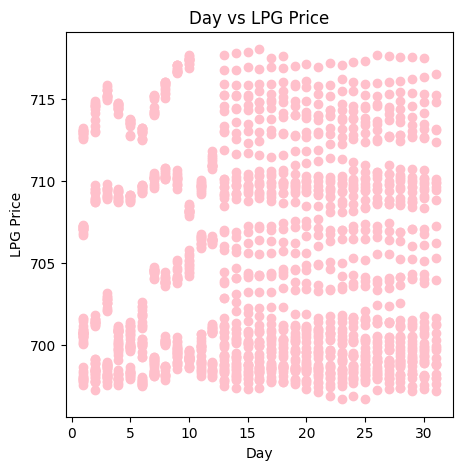

In [50]:
plt.figure(figsize=(5,5))
plt.scatter(data['day'], data['LPG_Price'], color='pink')
plt.xlabel('Day')
plt.ylabel('LPG Price')
plt.title('Day vs LPG Price')
plt.show()


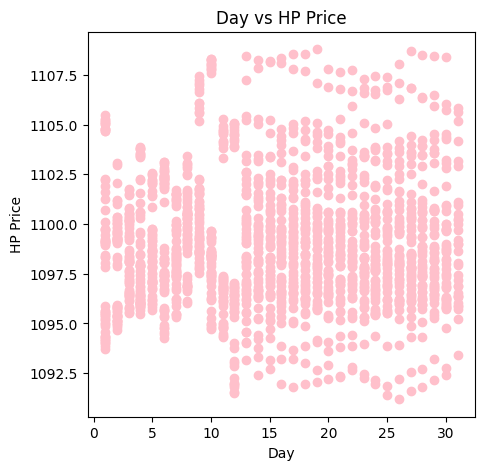

In [51]:
plt.figure(figsize=(5,5))
plt.scatter(data['day'], data['HP_Price'], color='pink')
plt.xlabel('Day')
plt.ylabel('HP Price')
plt.title('Day vs HP Price')
plt.show()


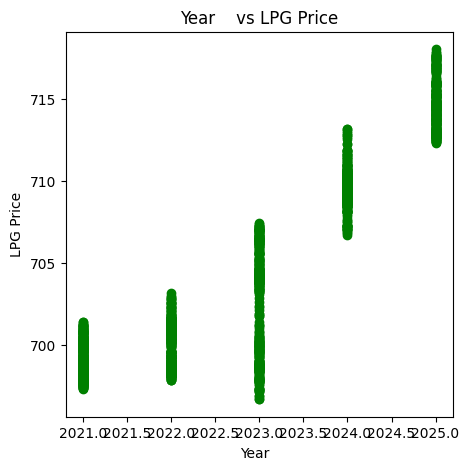

In [55]:
plt.figure(figsize=(5,5))
plt.scatter(data['year'], data['LPG_Price'], color='green')
plt.xlabel('Year  ')
plt.ylabel('LPG Price')
plt.title('Year    vs LPG Price')
plt.show()


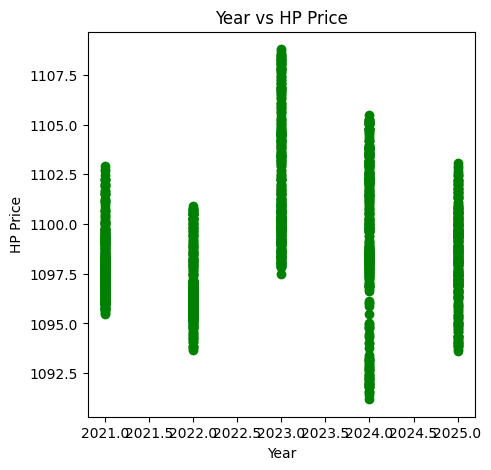

In [56]:
plt.figure(figsize=(5,5))
plt.scatter(data['year'], data['HP_Price'], color='green')
plt.xlabel('Year')
plt.ylabel('HP Price')
plt.title('Year vs HP Price')
plt.show()


HEAT MAP

<Axes: >

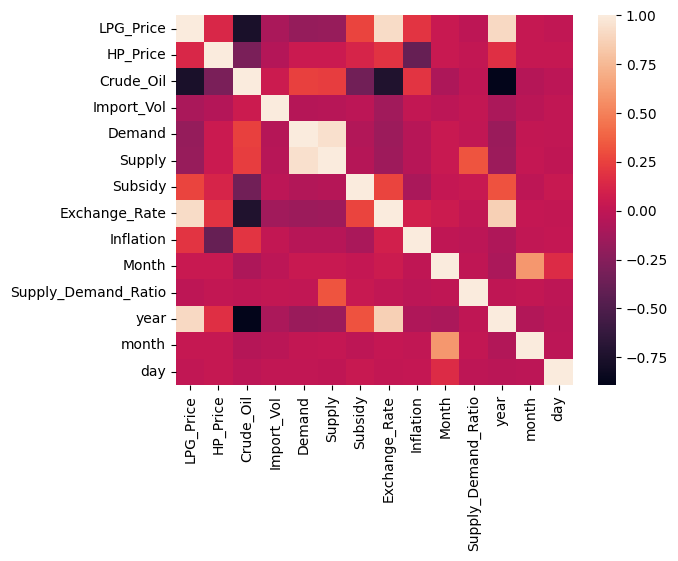

In [57]:
sns.heatmap(data.corr())

BAR GRAPH

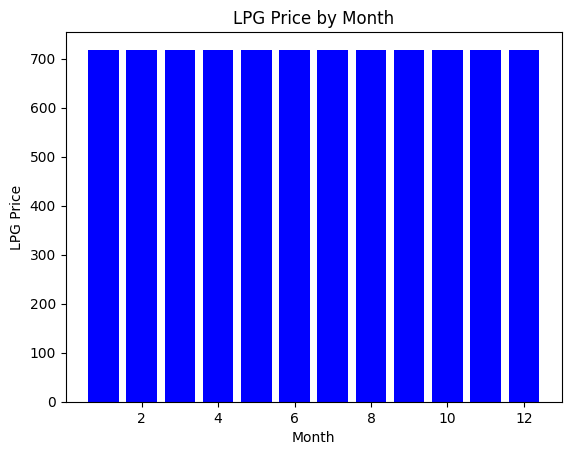

In [59]:
plt.bar(data['month'], data['LPG_Price'], color='blue')
plt.xlabel('Month')
plt.ylabel('LPG Price')
plt.title('LPG Price by Month')
plt.show()


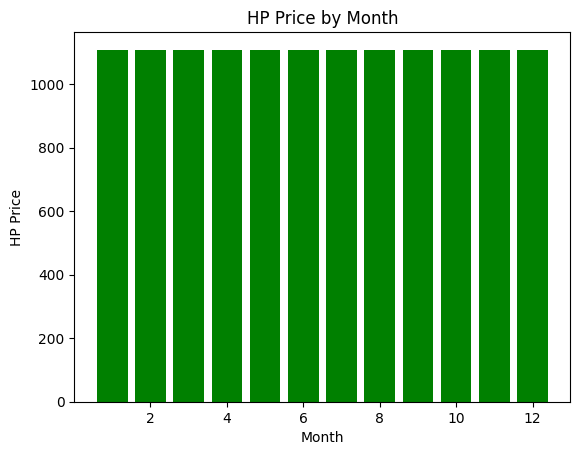

In [60]:
plt.bar(data['month'], data['HP_Price'], color='green')
plt.xlabel('Month')
plt.ylabel('HP Price')
plt.title('HP Price by Month')
plt.show()


LINE GRAPH

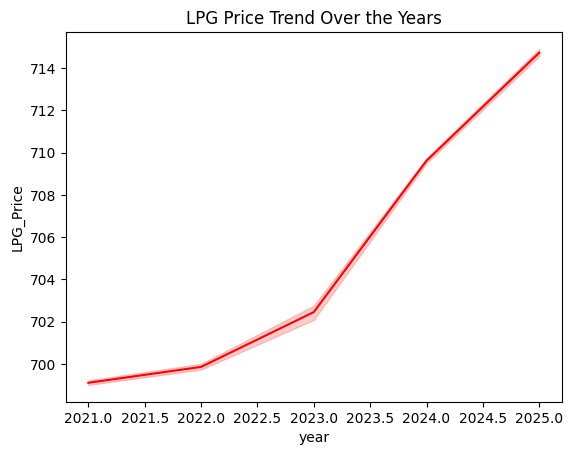

In [62]:
sns.lineplot(x='year', y='LPG_Price', data=data, color='red')
plt.title('LPG Price Trend Over the Years')
plt.show()


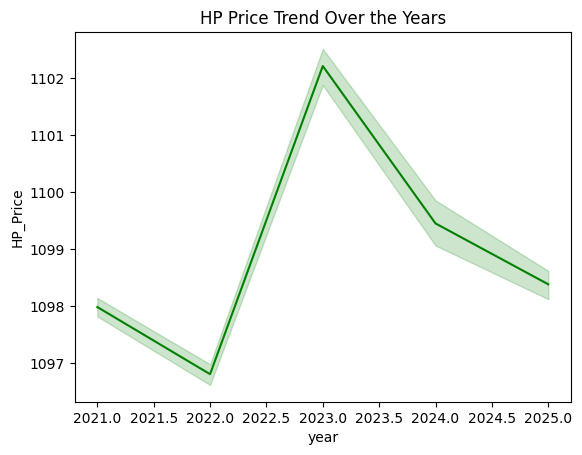

In [63]:
sns.lineplot(x='year', y='HP_Price', data=data, color='green')
plt.title('HP Price Trend Over the Years')
plt.show()


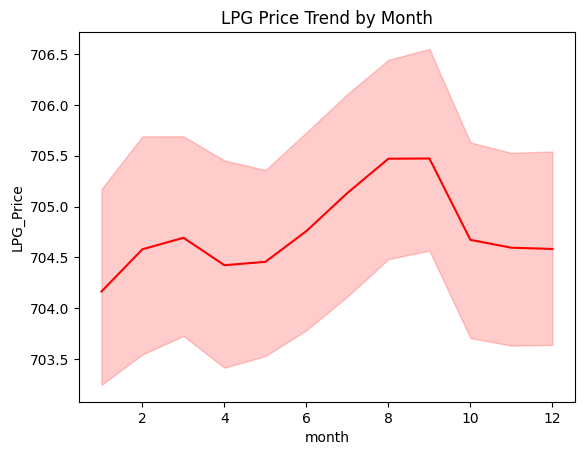

In [65]:
sns.lineplot(x='month', y='LPG_Price', data=data, color='red')
plt.title('LPG Price Trend by Month')
plt.show()


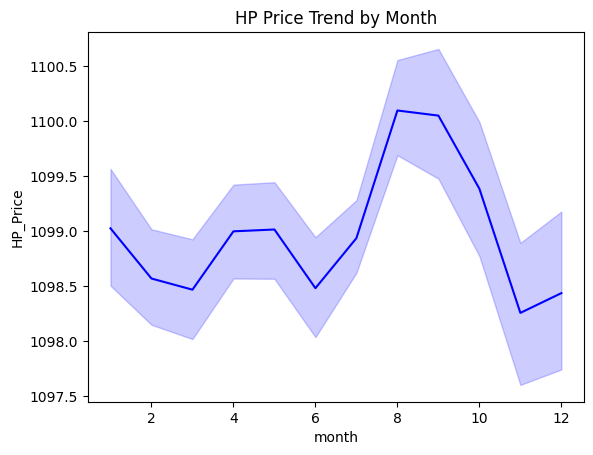

In [66]:
sns.lineplot(x='month', y='HP_Price', data=data, color='blue')
plt.title('HP Price Trend by Month')
plt.show()


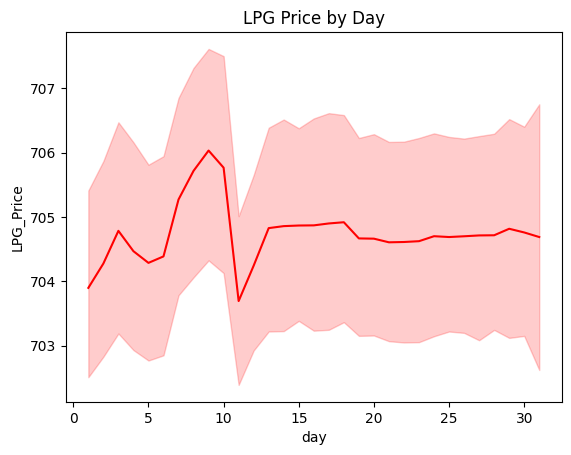

In [68]:
sns.lineplot(x='day', y='LPG_Price', data=data, color='red')
plt.title('LPG Price by Day')
plt.show()


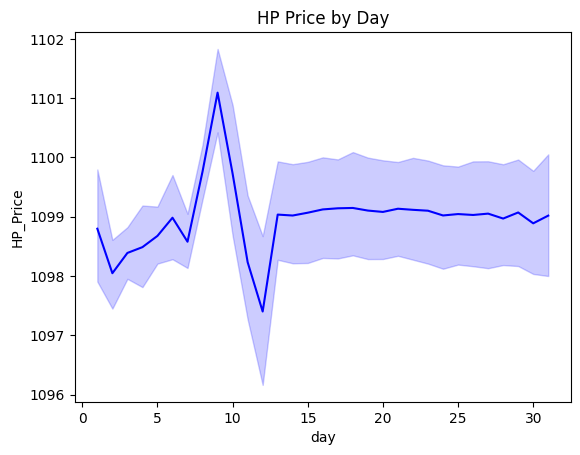

In [69]:
sns.lineplot(x='day', y='HP_Price', data=data, color='blue')
plt.title('HP Price by Day')
plt.show()


HISTOGRAM

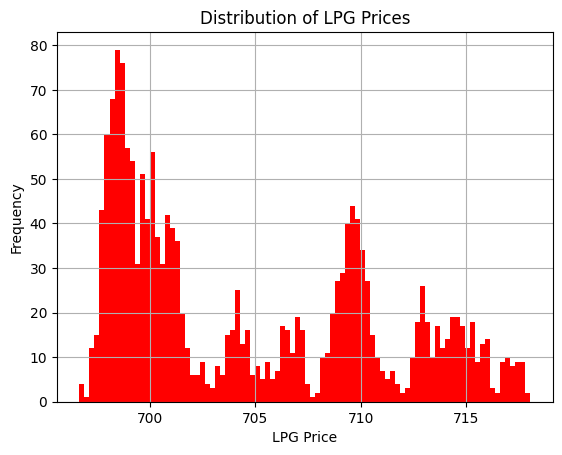

In [71]:
data['LPG_Price'].hist(bins=90, color='red')
plt.title('Distribution of LPG Prices')
plt.xlabel('LPG Price')
plt.ylabel('Frequency')
plt.show()


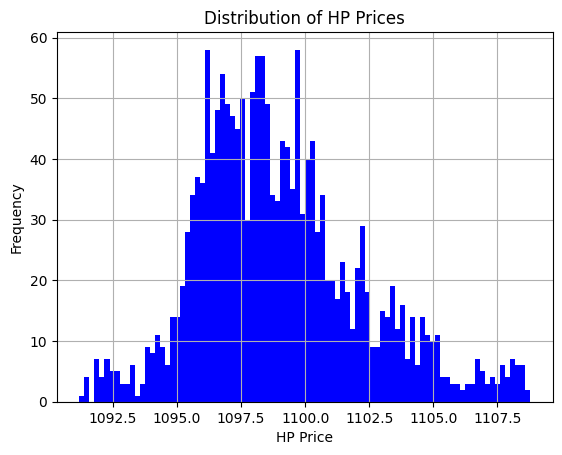

In [72]:
data['HP_Price'].hist(bins=90, color='blue')
plt.title('Distribution of HP Prices')
plt.xlabel('HP Price')
plt.ylabel('Frequency')
plt.show()


BOX PLOT

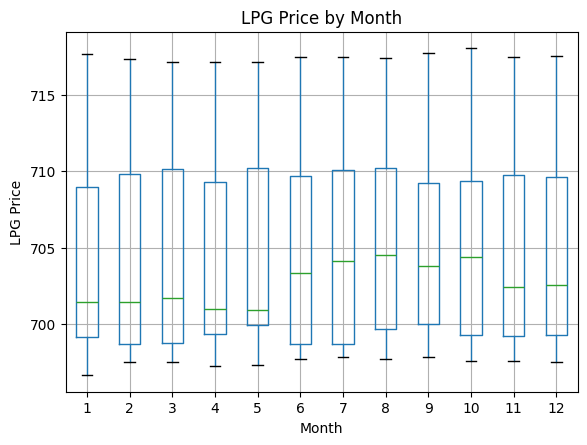

In [74]:
data.boxplot(column='LPG_Price', by='month')
plt.title('LPG Price by Month')
plt.suptitle('')  # Removes the automatic title
plt.xlabel('Month')
plt.ylabel('LPG Price')
plt.show()


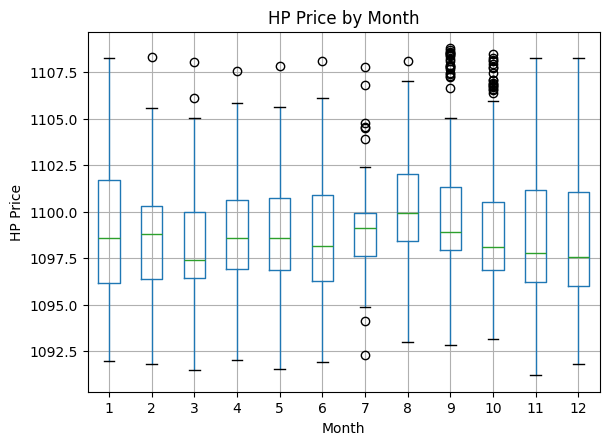

In [75]:
data.boxplot(column='HP_Price', by='month')
plt.title('HP Price by Month')
plt.suptitle('')
plt.xlabel('Month')
plt.ylabel('HP Price')
plt.show()


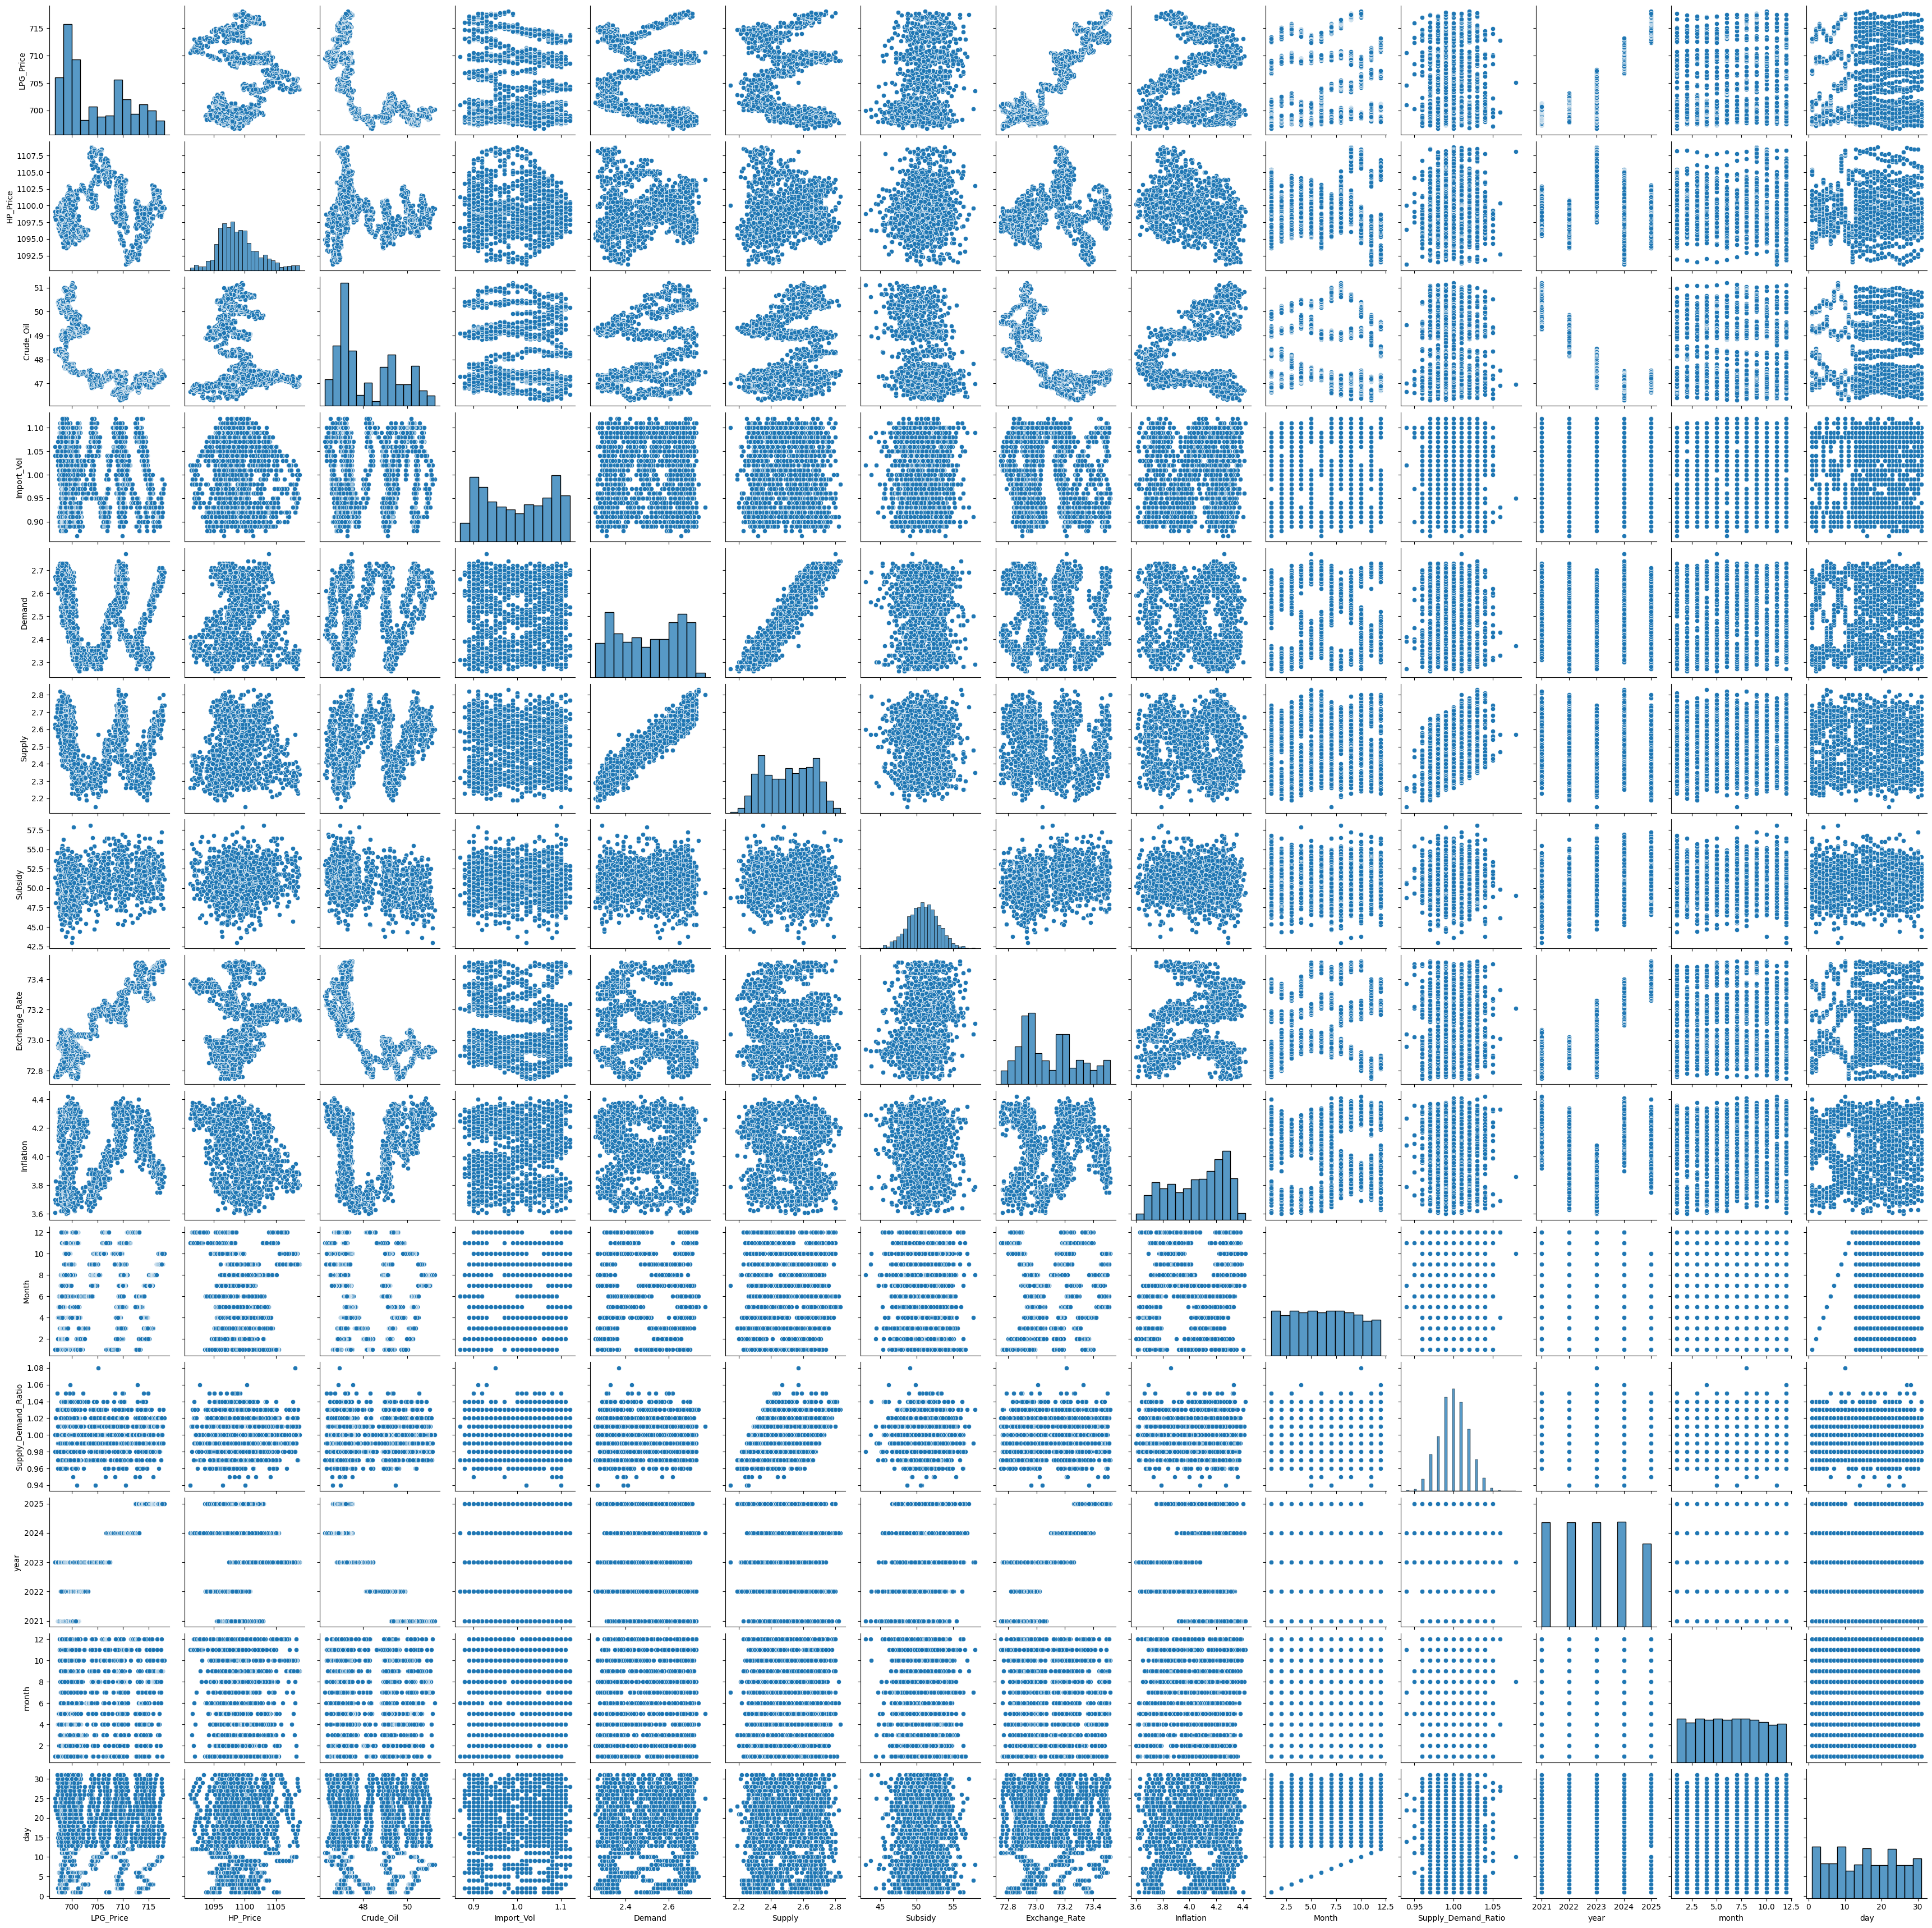

In [77]:
sns.pairplot(data)
plt.show()

# separating dependent and independent variables

In [78]:
x=data.iloc[:,1:4].values
y=data.iloc[:,0].values
x

array([[1.09974e+03, 4.99700e+01, 1.00000e+00],
       [1.09901e+03, 4.99100e+01, 1.00000e+00],
       [1.09921e+03, 4.99200e+01, 9.90000e-01],
       ...,
       [1.09964e+03, 4.73200e+01, 9.80000e-01],
       [1.09966e+03, 4.72800e+01, 9.90000e-01],
       [1.09968e+03, 4.72200e+01, 9.90000e-01]])

In [79]:
x

array([[1.09974e+03, 4.99700e+01, 1.00000e+00],
       [1.09901e+03, 4.99100e+01, 1.00000e+00],
       [1.09921e+03, 4.99200e+01, 9.90000e-01],
       ...,
       [1.09964e+03, 4.73200e+01, 9.80000e-01],
       [1.09966e+03, 4.72800e+01, 9.90000e-01],
       [1.09968e+03, 4.72200e+01, 9.90000e-01]])

In [80]:
y

array([700.1 , 700.07, 700.2 , ..., 718.04, 717.5 , 717.64])

# Encoding

Since in our dataset we are having all the columns as numerical value, there isn't any requirement for encoding.

# Standardizing

In [81]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
x=sc.fit_transform(x)
x

array([[ 0.23210388,  1.31098835,  0.00470318],
       [ 0.00552038,  1.26576732,  0.00470318],
       [ 0.06759805,  1.27330415, -0.13495721],
       ...,
       [ 0.20106504, -0.6862739 , -0.2746176 ],
       [ 0.20727281, -0.71642125, -0.13495721],
       [ 0.21348058, -0.76164229, -0.13495721]])

# Train and Test


In [82]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [83]:
x_train.shape

(1401, 3)

In [84]:
y_train.shape

(1401,)

# Model Building


## Random Forest Regerssor

In [94]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
import joblib


In [95]:
rfr = RandomForestRegressor(n_estimators=1, random_state=10)
rfr.fit(x_train,y_train)
y_pred_rfr=rfr.predict(x_test)
y_pred_rfr

array([709.58, 698.55, 702.78, 699.35, 698.76, 710.24, 709.58, 703.99,
       716.06, 699.19, 697.69, 698.16, 713.68, 697.58, 699.71, 700.96,
       715.7 , 709.58, 697.58, 697.96, 714.  , 708.65, 700.1 , 709.74,
       702.37, 709.26, 707.54, 699.14, 701.18, 698.05, 709.02, 706.19,
       708.08, 710.47, 700.96, 717.16, 714.15, 704.43, 701.38, 697.74,
       700.41, 709.49, 708.59, 698.79, 698.6 , 709.07, 698.73, 713.06,
       709.22, 709.22, 698.14, 699.78, 715.47, 698.1 , 702.78, 709.15,
       699.78, 698.56, 703.79, 712.68, 709.2 , 712.99, 698.75, 698.87,
       700.91, 700.03, 709.2 , 698.25, 703.99, 699.98, 697.83, 698.21,
       702.42, 697.74, 702.7 , 699.04, 710.57, 700.13, 698.54, 708.47,
       704.23, 701.19, 699.71, 707.2 , 699.6 , 717.46, 708.47, 698.73,
       717.4 , 697.85, 715.2 , 698.19, 714.  , 699.05, 697.83, 703.99,
       709.22, 699.92, 697.84, 696.86, 701.85, 700.69, 713.06, 698.1 ,
       698.93, 706.46, 707.88, 709.99, 699.92, 698.55, 699.93, 702.37,
      

In [96]:
y_test

array([709.47, 699.04, 700.91, 698.25, 698.55, 710.14, 708.34, 703.74,
       715.86, 699.09, 697.95, 699.81, 713.73, 697.51, 699.73, 701.07,
       716.68, 708.17, 697.8 , 698.19, 714.38, 709.73, 700.73, 709.58,
       699.55, 709.67, 707.23, 698.94, 700.9 , 697.97, 704.44, 706.16,
       708.92, 710.24, 701.25, 709.36, 716.92, 703.77, 700.83, 697.32,
       700.22, 704.1 , 708.82, 698.98, 698.39, 704.56, 698.83, 713.23,
       710.67, 709.79, 697.98, 700.53, 715.46, 698.39, 701.91, 709.66,
       699.97, 698.7 , 704.1 , 712.84, 710.18, 712.7 , 698.9 , 699.07,
       700.79, 700.49, 710.1 , 698.18, 703.98, 699.88, 697.88, 698.03,
       699.33, 698.39, 699.61, 697.72, 710.65, 699.66, 699.98, 708.13,
       704.05, 700.74, 699.88, 706.69, 700.4 , 714.08, 708.2 , 698.86,
       717.43, 697.94, 714.89, 698.46, 714.42, 699.22, 698.03, 703.63,
       709.57, 700.03, 697.79, 697.35, 701.23, 701.13, 713.24, 697.95,
       698.77, 706.02, 709.58, 710.12, 699.6 , 698.8 , 699.83, 699.24,
      

In [97]:
accur_rfr=r2_score(y_test,y_pred_rfr)
print(accur_rfr)

0.9303463954931217


Saving the RandomForestRegressor model into the folder via joblib library.

In [98]:
joblib.dump(rfr,"../models/RandomForestRegressor.save")

['../models/RandomForestRegressor.save']

# Model Evaluation for Random Forest Regressor


In [109]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from math import sqrt


In [110]:
mean_absolute_error(y_test,y_pred_rfr)

0.7696866096866138

In [111]:
mean_squared_error(y_test,y_pred_rfr)

2.5357384615384726

In [112]:
sqrt(mean_squared_error(y_test,y_pred_rfr))

1.5924002202770737

from the evaluation report we can see that the Random Forest Regressor is more closer to zero.